In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import gc # We're gonna be clearing memory a lot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

p = sns.color_palette()

In [5]:
df_train = pd.read_csv('data/clicks_train.csv')

In [24]:
df_train.head()

,display_id,ad_id,clicked
0,1,42337,0
1,1,139684,0
2,1,144739,1
3,1,156824,0
4,1,279295,0


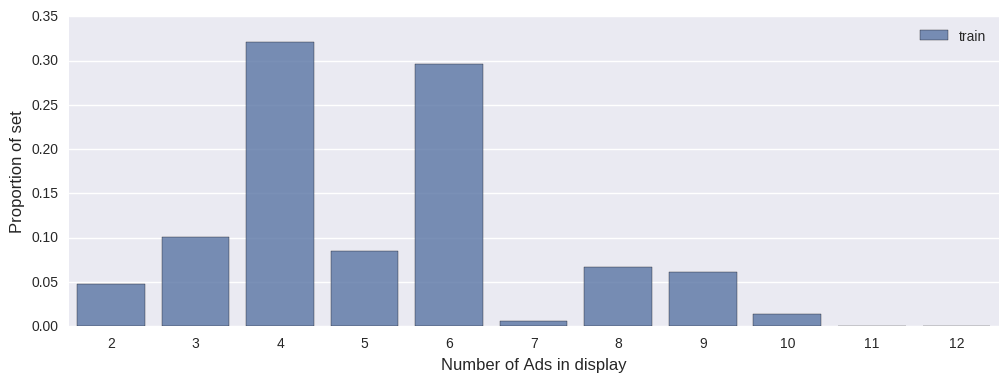

In [7]:
sizes_train = df_train.groupby('display_id')['ad_id'].count().value_counts()
sizes_train = sizes_train / np.sum(sizes_train)

plt.figure(figsize=(12,4));
sns.barplot(sizes_train.index, sizes_train.values, alpha=0.8, color=p[0], label='train');
plt.legend();
plt.xlabel('Number of Ads in display', fontsize=12);
plt.ylabel('Proportion of set', fontsize=12);

Ads that appear less than 2 times: 22.69%
Ads that appear less than 10 times: 61.74%
Ads that appear less than 50 times: 86.93%
Ads that appear less than 100 times: 91.04%
Ads that appear less than 1000 times: 97.45%


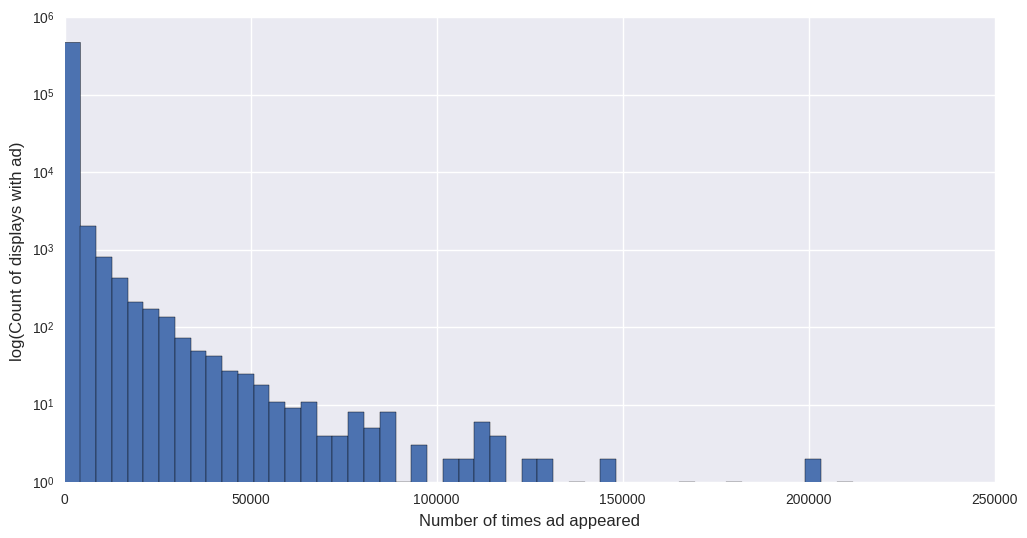

In [8]:
ad_usage_train = df_train.groupby('ad_id')['ad_id'].count()

for i in [2, 10, 50, 100, 1000]:
    print('Ads that appear less than {} times: {}%'.format(i, round((ad_usage_train < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(ad_usage_train.values, bins=50, log=True)
plt.xlabel('Number of times ad appeared', fontsize=12)
plt.ylabel('log(Count of displays with ad)', fontsize=12)
plt.show()


In [32]:
numTimesAdAppeared = 15000
mostFrequentAds = ad_usage_train[ad_usage_train > numTimesAdAppeared].sort_values(ascending=False)

print mostFrequentAds
print ('Count = {}'.format(mostFrequentAds.shape))

ad_id
173005    211824
180923    203159
123742    202099
151028    181319
173006    168139
347688    147877
138353    144467
130952    135789
288396    128607
173403    128030
225438    124462
174547    123899
288385    117057
228959    116295
202812    115819
92759     115654
190216    113798
173130    111937
190062    111894
61159     111718
95103     111281
269777    110620
57071     109595
187797    108989
26711     104259
25876     101897
116261     96419
141024     94865
55518      93412
270253     91158
           ...  
152232     15314
251959     15302
104813     15297
150458     15283
103321     15272
162154     15236
376957     15235
169836     15218
80177      15218
252026     15193
167516     15178
208613     15174
141532     15170
180960     15161
308910     15140
156821     15139
406782     15130
173410     15122
26724      15106
72073      15103
139936     15103
354799     15101
221782     15097
199081     15093
172888     15081
59599      15059
170392     15054
167457  

In [50]:
mostFrequentAds.iloc[0:1]

ad_id
173005    211824
Name: ad_id, dtype: int64

In [51]:
mfID = 173005

In [59]:
timesClicked = df_train[df_train['ad_id'] == mfID]['clicked'].sum()
timesShown = df_train[df_train['ad_id'] == mfID]['clicked'].count()

print (float(timesClicked)/timesShown*100)

7.63841679885


In [57]:
timesClicked

16180

In [58]:
timesShown

211824